# 군집화 Clustering



## K - means

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd



In [2]:
iris = load_iris()

# feature 데이터만 별도로 저장
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print(irisDF.shape)
irisDF.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Kmeans 객체 생성

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0)

# 붓꽃 데이터에 군집화 수행
kmeans.fit(irisDF)

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
# 각 데이터들마다 centroid 할당
print(kmeans.labels_)

irisDF['cluster'] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
# target 별 군집 중심점 확인

irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [13]:
# 2차원 평면에 데이터 군집화된 결과 나타내기 위해 2차원 PCA로 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


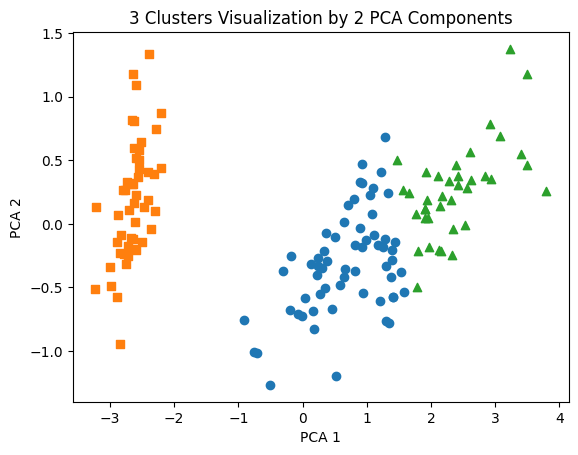

In [12]:
# cluster 값이 0,1,2 인 경우마다 별도의 index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0,1,2에 해당하는Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. 
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 실루엣 계수 silhouette

In [14]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric값을 구하기 위한 API 추가 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris = load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)

# kmeans 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)

# 데이터당 클러스터값 할당
irisDF['cluster'] = kmeans.labels_

print(irisDF.shape)
irisDF.head()

(150, 5)


c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [16]:
# iris 모든 개별 데이터에 실루엣 계수값을 구함.

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF 실루엣 계수 컬럼 추가 
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:3f}'.format(average_score))

irisDF.head(15)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.552819


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


<Axes: >

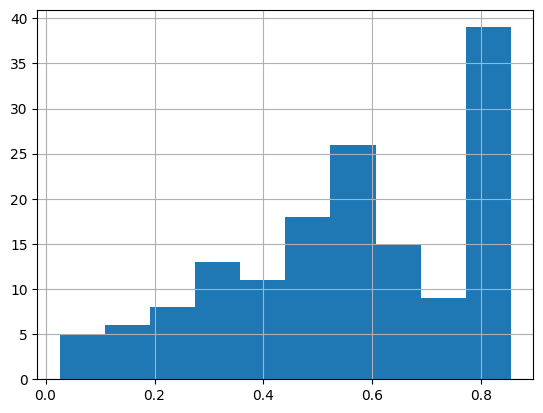

In [17]:
irisDF['silhouette_coeff'].hist()

In [22]:
def visualize_silhouette(cluster_lists, X_features) :

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함 
    n_cols = len(cluster_lists)

    # plt.subplots() 으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists) :

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters= n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n'\
                           'Silhouette Score : ' + str(round(sil_avg,3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1)*10])
        axs[ind].set_yticks([]) # Clear the y_axis labels / ticks
        axs[ind].set_xticks([0, .2, .4, .6, .8, 1])

        # 클러스터링 갯수별로 fill_betweenx()형태의 막대그래프 표현. 
        for i in range(n_cluster) :
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                   facecolor = color, edgecolor=color, alpha=.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color='red', linestyle='--')

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

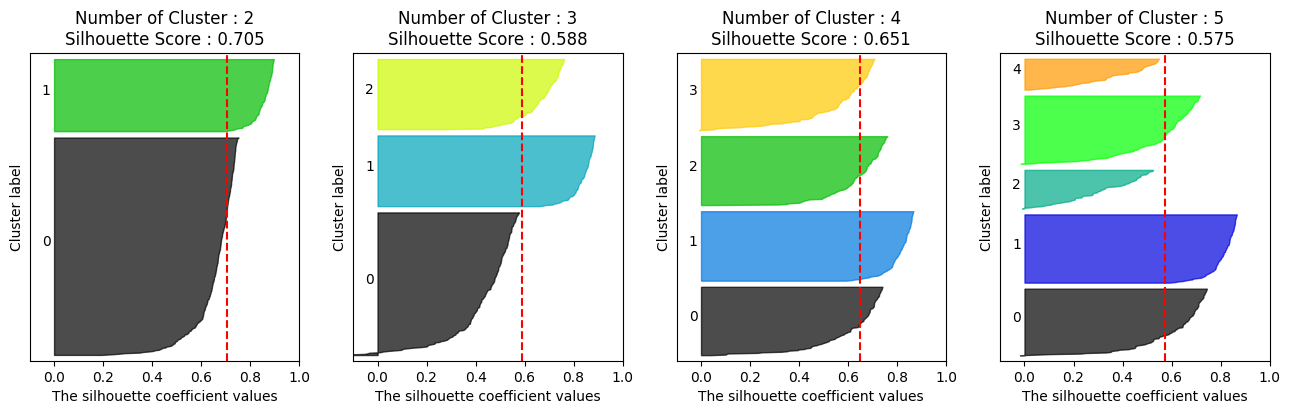

In [23]:
# make_blobs 를 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                 center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2,3,4,5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

## Mean Shift clustering

In [24]:
# make_blobs()를 이용하여 2개의 feature와 
# 3개의 군집중심점을 가지는 임의의 데이터 200개를 생성하고 
# MeanShift를 이용하여 군집화 수행

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, 
                 cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels)) 

cluster labels 유형: [0 1 2 3 4 5]


In [25]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


In [26]:
# 최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [27]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


> 시각화

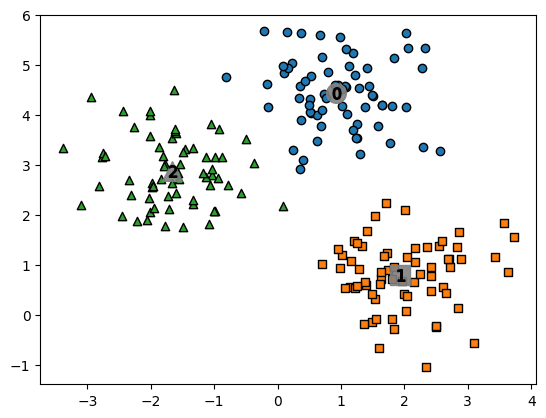

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현 
    plt.scatter(x=center_x_y[0], y =center_x_y[1], s=200, color='gray', alpha=.9 , marker= markers[label])
    plt.scatter(x=center_x_y[0], y =center_x_y[1], s=70, color='k', edgecolor='k', marker = '$%d$'%label)

plt.show()

In [29]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
